In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def save_heatmap(A, filename, title):
    fig, ax = plt.subplots()
    ax.imshow(A, origin="upper", cmap="plasma")
    ax.set_title(title, color="white")
    ax.set_xlabel("j index", color="white")
    ax.set_ylabel("i index", color="white")

    # ticks + tick labels in white
    ax.tick_params(axis="both", colors="white")  # tick marks + numbers

    # also make the axes border (spines) white (optional but nice)
    for spine in ax.spines.values():
        spine.set_color("white")

    # transparent background
    fig.patch.set_alpha(0)
    ax.patch.set_alpha(0)

    fig.savefig(filename, dpi=300, transparent=True, bbox_inches="tight", pad_inches=0)
    plt.close(fig)

N = 100
total = N + 2
init = np.fromfile("initial.bin", dtype=np.double).reshape((102, 102))
sol  = np.fromfile("solution.bin", dtype=np.double).reshape((total, total))

save_heatmap(init, "initial.png", "Initial Matrix")
save_heatmap(sol,  "solution.png", "After Jacobi")

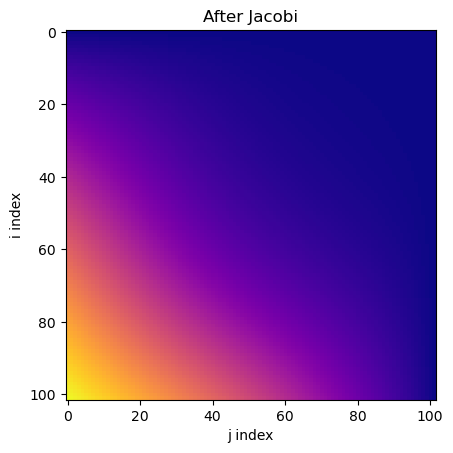

In [17]:
# Run the code with N=100 for 2000 iterations to generate 'initial.bin' and 'solution.bin'
N = 100
total = N + 2
init = np.fromfile('initial.bin', dtype=np.double).reshape((102, 102))
sol  = np.fromfile('solution.bin', dtype=np.double).reshape((total, total))

# First figure: Initial matrix
plt.figure()
plt.imshow(init, origin='upper', cmap='plasma')
plt.title('Initial Matrix')
plt.xlabel('j index')
plt.ylabel('i index')
plt.savefig("initial.png", dpi=300, transparent=True, bbox_inches="tight", pad_inches=0)
plt.close()
plt.show()

#2000 iterations

# Second figure: After Jacobi
plt.figure()
plt.imshow(sol, origin='upper', cmap='plasma')
plt.title('After Jacobi')
plt.xlabel('j index')
plt.ylabel('i index')
plt.show()

In [11]:
df = pd.read_csv('times.csv')
df["size"] = df["size"] / 4

df = df.drop(columns=["rank", "iters", "N"]) 
df.columns = ["Nodes","Initialization","Communication","Computation","Total"]

df



,Nodes,Initialization,Communication,Computation,Total
0,1.0,0.158911,0.090799,1.361418,1.611128
1,2.0,0.085700,0.106090,0.693798,0.885588
2,4.0,0.049432,0.145078,0.352613,0.547122
3,8.0,0.031362,0.147278,0.184563,0.363203
4,16.0,0.025740,0.214139,0.101606,0.341485
5,24.0,0.022599,0.266417,0.051660,0.340676
6,32.0,0.021034,0.273071,0.042137,0.398431
7,48.0,0.018144,0.479180,0.031728,0.529052
8,64.0,0.019391,0.729046,0.026187,0.774624
9,1.0,1.293308,0.233009,11.781590,13.307907


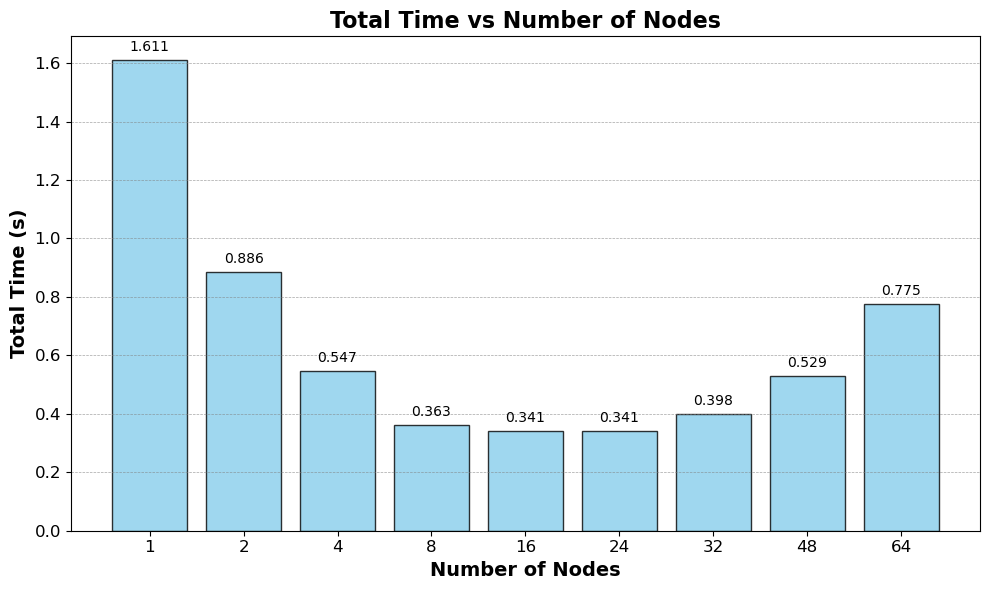

In [24]:
#take just the results for 10k size
df10k = df.iloc[:9]             
x = np.arange(len(df10k))

plt.figure(figsize=(10, 6))
bars = plt.bar(x, df10k['Total'], color='skyblue', alpha=0.8, edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,
             f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Number of Nodes', fontsize=14, fontweight='bold')
plt.ylabel('Total Time (s)', fontsize=14, fontweight='bold')
plt.title('Total Time vs Number of Nodes', fontsize=16, fontweight='bold')

# show node labels (no decimals)
plt.xticks(x, [f"{int(n)}" for n in df10k['Nodes']], fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tight_layout()
plt.show()


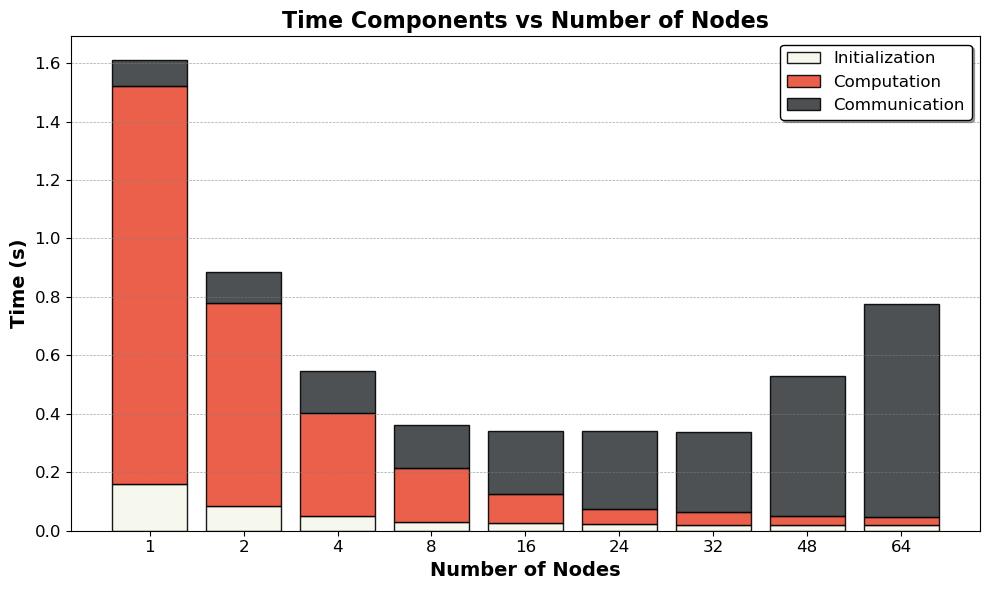

In [26]:
x = np.arange(len(df10k))         
w = 0.8                        

plt.figure(figsize=(10, 6))

plt.bar(x, df10k['Initialization'],
        color="#f6f7eb", label='Initialization', alpha=0.9, edgecolor='black', width=w)

plt.bar(x, df10k['Computation'],
        bottom=df10k['Initialization'],
        color="#e94f37", label='Computation', alpha=0.9, edgecolor='black', width=w)

plt.bar(x, df10k['Communication'],
        bottom=df10k['Initialization'] + df10k['Computation'],
        color="#393e41", label='Communication', alpha=0.9, edgecolor='black', width=w)

plt.xlabel('Number of Nodes', fontsize=14, fontweight='bold')
plt.ylabel('Time (s)', fontsize=14, fontweight='bold')
plt.title('Time Components vs Number of Nodes', fontsize=16, fontweight='bold')

plt.xticks(x, [f"{int(n)}" for n in df10k['Nodes']], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
           facecolor='white', edgecolor='black')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tight_layout()
plt.show()

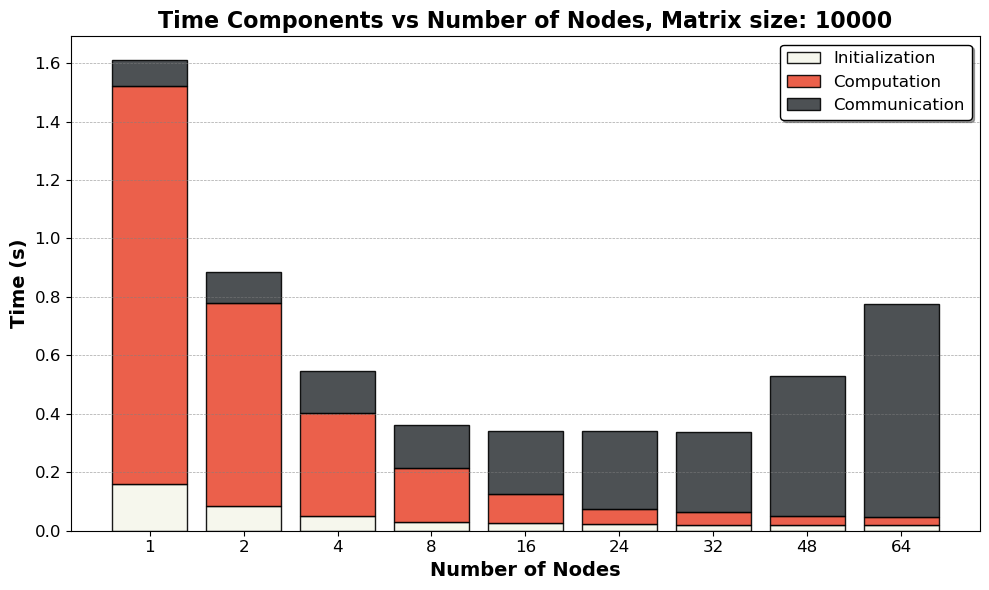

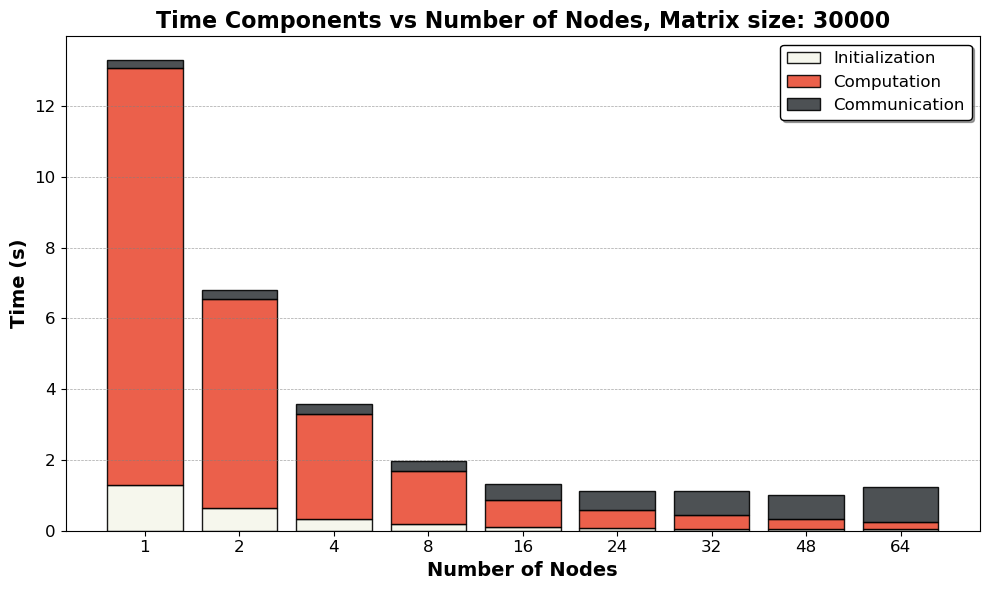

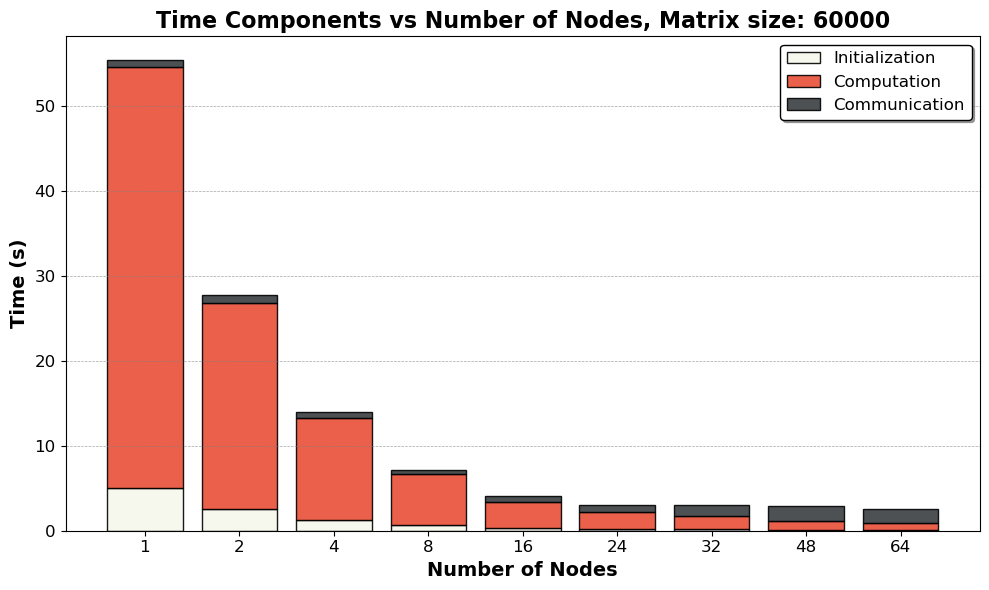

In [4]:
BLOCK = 9   # rows per plot
MATRIX_SIZES = [10000, 30000, 60000]

for i in range(0, len(df), BLOCK):
    
    block_id = i // BLOCK

    if block_id >= len(MATRIX_SIZES):
        break  
    
    df_block = df.iloc[i:i+BLOCK]


    if len(df_block) < BLOCK:
        continue

    x = np.arange(len(df_block))
    w = 0.8

    plt.figure(figsize=(10, 6))

    plt.bar(
        x, df_block['Initialization'],
        color="#f6f7eb", label='Initialization',
        alpha=0.9, edgecolor='black', width=w
    )

    plt.bar(
        x, df_block['Computation'],
        bottom=df_block['Initialization'],
        color="#e94f37", label='Computation',
        alpha=0.9, edgecolor='black', width=w
    )

    plt.bar(
        x, df_block['Communication'],
        bottom=df_block['Initialization'] + df_block['Computation'],
        color="#393e41", label='Communication',
        alpha=0.9, edgecolor='black', width=w
    )

    plt.xlabel('Number of Nodes', fontsize=14, fontweight='bold')
    plt.ylabel('Time (s)', fontsize=14, fontweight='bold')

    block_id = i // BLOCK
    N = MATRIX_SIZES[block_id]
    

    start = i
    end = i + BLOCK - 1
    plt.title(
        f'Time Components vs Number of Nodes, Matrix size: {N}',
        fontsize=16, fontweight='bold'
    )

    plt.xticks(
        x,
        [f"{int(n)}" for n in df_block['Nodes']],
        fontsize=12
    )

    plt.yticks(fontsize=12)

    plt.legend(
        loc='upper right',
        fontsize=12,
        frameon=True,
        shadow=True,
        facecolor='white',
        edgecolor='black'
    )

    plt.grid(
        axis='y',
        linestyle='--',
        linewidth=0.5,
        color='gray',
        alpha=0.7
    )

    plt.tight_layout()
    plt.show()

In [14]:
#take just the results for 30k size
df30k = df.iloc[9:18]

df30k

,Nodes,Initialization,Communication,Computation,Total
9,1.0,1.293308,0.233009,11.781590,13.307907
10,2.0,0.656067,0.256021,5.899084,6.811171
11,4.0,0.336897,0.273903,2.968759,3.579559
12,8.0,0.176856,0.305709,1.498684,1.981250
13,16.0,0.099832,0.451088,0.763137,1.314057
14,24.0,0.071889,0.542115,0.517445,1.131448
15,32.0,0.058576,0.664348,0.393780,1.116704
16,48.0,0.043670,0.674040,0.280354,0.998063
17,64.0,0.037795,0.995361,0.215145,1.248301


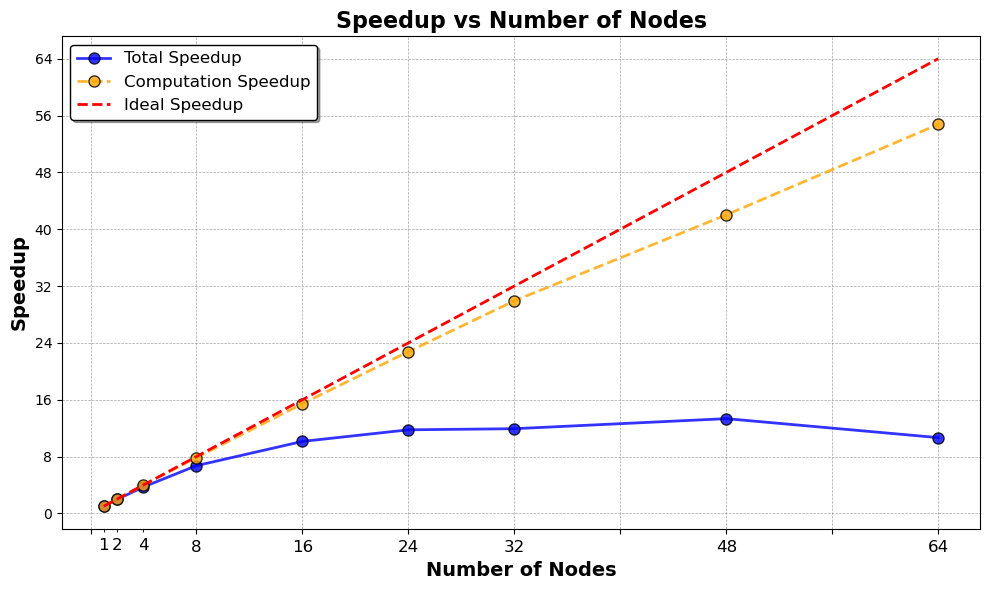

In [6]:
from matplotlib.ticker import MultipleLocator, FuncFormatter, FixedLocator

df30k = df.iloc[9:18].copy()
x = np.arange(len(df30k))


serial_time = df30k['Total'].iloc[0]
serial_time_comp = df30k['Computation'].iloc[0]

df30k['Speedup'] = serial_time / df30k['Total']
df30k['Speedup_comp'] = serial_time_comp / df30k['Computation']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df30k['Nodes'], df30k['Speedup'], marker='o', linestyle='-', color='blue',
        markersize=8, linewidth=2, alpha=0.8, label='Total Speedup', markerfacecolor='blue', markeredgecolor='black')
ax.plot(df30k['Nodes'], df30k['Speedup_comp'],
        linestyle='--', color='orange', linewidth=2, alpha=0.8, label='Computation Speedup',
        marker='o', markersize=8,
        markerfacecolor='orange', markeredgecolor='black')

ax.plot(df30k['Nodes'], df30k['Nodes'], color='red', linestyle='--', linewidth=2, label='Ideal Speedup')

#ax.fill_between(df['Nodes'], df['Speedup'], color='blue', alpha=0.1)
#ax.fill_between(df['Nodes'], df['Speedup_comp'], color='orange', alpha=0.1)

# --- GRID: uniform major ticks ---
ax.xaxis.set_major_locator(MultipleLocator(8))   # grid every 8 nodes
ax.yaxis.set_major_locator(MultipleLocator(8))
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# --- X LABELS: show ONLY these numbers ---
label_nodes = np.array([1, 2, 4, 8, 16, 24, 32, 48, 64])
label_set = set(label_nodes.tolist())

# Major ticks are at ..., 8,16,24,... (so we label those via a formatter)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x)}" if x in label_set else ""))

# Minor ticks for the ones that are NOT on the major grid (1,2,4)
minor_nodes = [n for n in label_nodes if n % 8 != 0]
ax.xaxis.set_minor_locator(FixedLocator(minor_nodes))
ax.set_xticks(minor_nodes, minor=True)
ax.set_xticklabels([str(n) for n in minor_nodes], minor=True)

ax.tick_params(axis='x', which='major', labelsize=12, pad=5)
ax.tick_params(axis='x', which='minor', labelsize=12, pad=5)

ax.set_xlabel('Number of Nodes', fontsize=14, fontweight='bold')
ax.set_ylabel('Speedup', fontsize=14, fontweight='bold')
ax.set_title('Speedup vs Number of Nodes', fontsize=16, fontweight='bold')
ax.legend(loc='upper left', fontsize=12, frameon=True, shadow=True,
          facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()


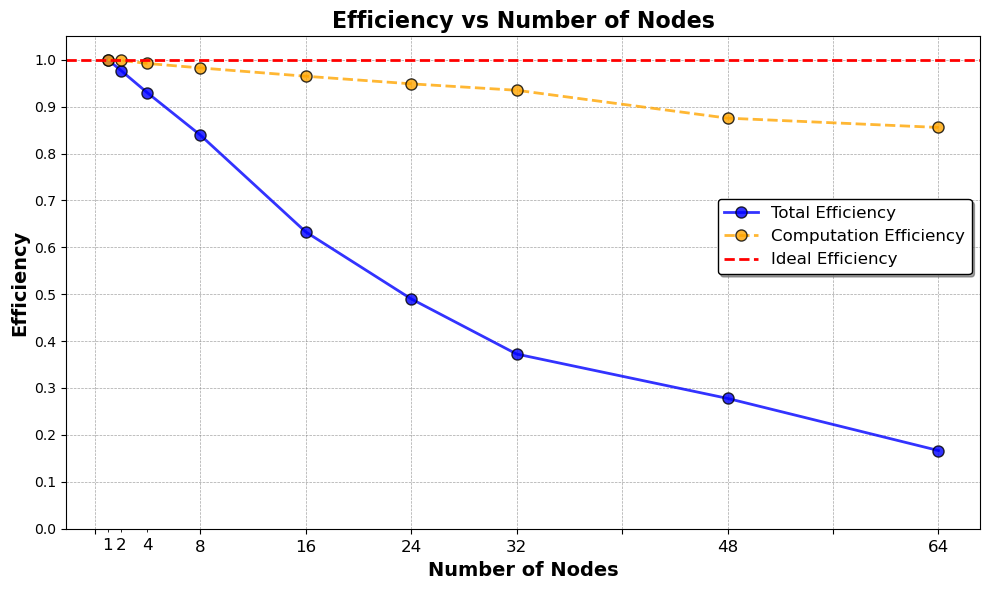

In [7]:
df30k['Efficiency'] = df30k['Speedup'] / df30k['Nodes']
df30k['Efficiency_comp'] = df30k['Speedup_comp'] / df30k['Nodes']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df30k['Nodes'], df30k['Efficiency'],
        marker='o', linestyle='-', color='blue',
        markersize=8, linewidth=2, alpha=0.8,
        label='Total Efficiency',
        markerfacecolor='blue', markeredgecolor='black')

ax.plot(df30k['Nodes'], df30k['Efficiency_comp'],
        marker='o', linestyle='--', color='orange',
        markersize=8, linewidth=2, alpha=0.8,
        label='Computation Efficiency',
        markerfacecolor='orange', markeredgecolor='black')

ax.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Ideal Efficiency')

# --- GRID: uniform major ticks ---
ax.xaxis.set_major_locator(MultipleLocator(8))   
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# --- X LABELS: show ONLY these numbers ---
label_nodes = np.array([1, 2, 4, 8, 16, 24, 32, 48, 64])
label_set = set(label_nodes.tolist())

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x)}" if x in label_set else ""))

minor_nodes = [n for n in label_nodes if n % 8 != 0]
ax.xaxis.set_minor_locator(FixedLocator(minor_nodes))
ax.set_xticks(minor_nodes, minor=True)
ax.set_xticklabels([str(n) for n in minor_nodes], minor=True)

ax.tick_params(axis='x', which='major', labelsize=12, pad=5)
ax.tick_params(axis='x', which='minor', labelsize=12, pad=5)

ax.set_ylim(0, 1.05)

ax.set_xlabel('Number of Nodes', fontsize=14, fontweight='bold')
ax.set_ylabel('Efficiency', fontsize=14, fontweight='bold')
ax.set_title('Efficiency vs Number of Nodes', fontsize=16, fontweight='bold')

ax.legend(loc='lower right', bbox_to_anchor=(1, 0.50), fontsize=12, frameon=True, shadow=True,
          facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()


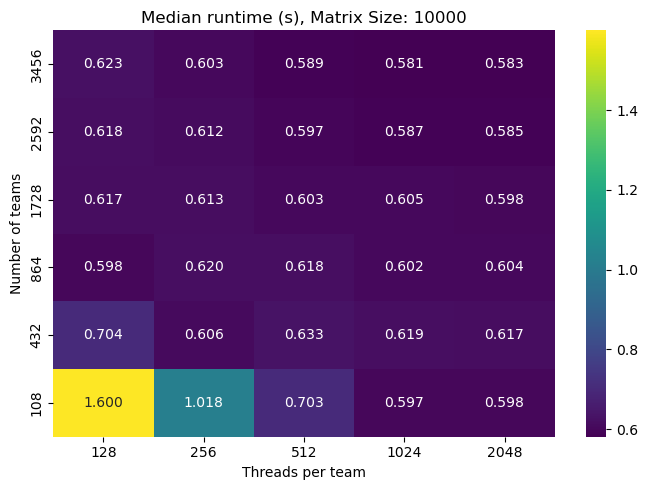

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("info.csv")

pivot = df.pivot(index="teams", columns="thread_limit", values="median_s")

plt.figure(figsize=(7,5))
ax = sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")

ax.invert_yaxis() 

plt.xlabel("Threads per team")
plt.ylabel("Number of teams")
plt.title("Median runtime (s), Matrix Size: 10000")
plt.tight_layout()
plt.show()


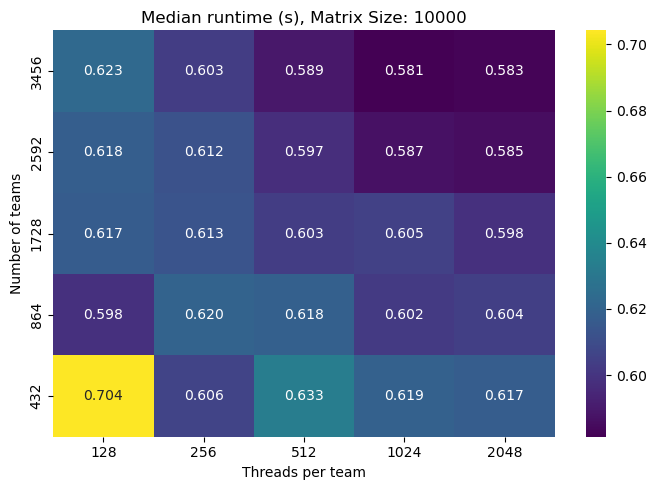

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("info.csv")
df = df.iloc[5:]
pivot = df.pivot(index="teams", columns="thread_limit", values="median_s")

plt.figure(figsize=(7,5))
ax = sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")

ax.invert_yaxis() 

plt.xlabel("Threads per team")
plt.ylabel("Number of teams")
plt.title("Median runtime (s), Matrix Size: 10000")
plt.tight_layout()
plt.show()
